In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib notebook

<IPython.core.display.Javascript object>


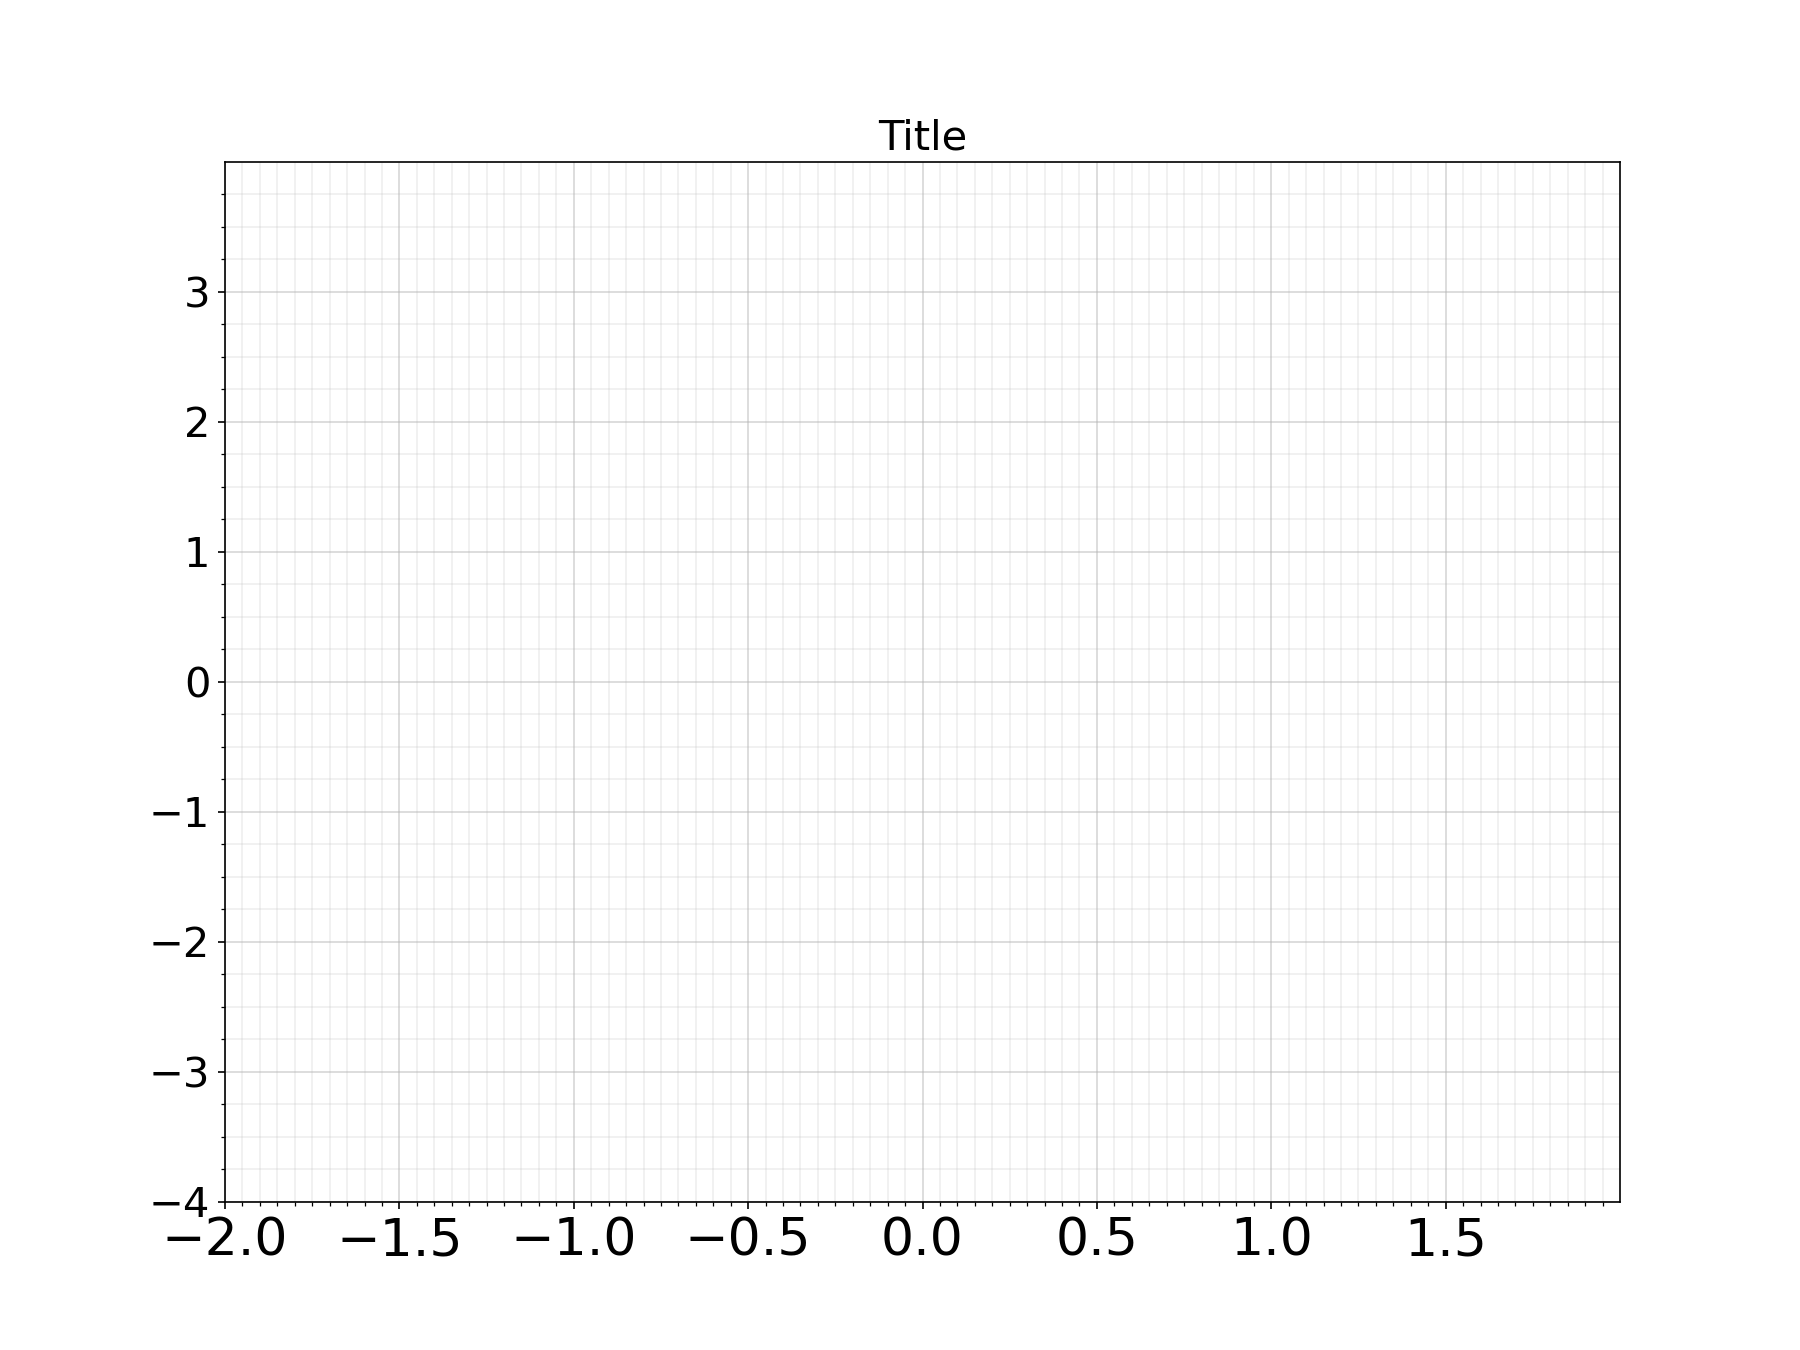

In [3]:
xPlotSize, yPlotSize = 12, 9
fig = plt.figure(figsize = (xPlotSize, yPlotSize))
ax = fig.add_subplot(111)

class plotSett:
    def __init__(self, ax =ax, font = 20, title = 'Title', fontx = None, fonty = None):
        self.font = font
        self.title = title
        #self.fig = plt.figure(figsize = (xPlotSize, yPlotSize))
        self.ax = ax
        
        if fontx == None:
            fontx = self.font
        if fonty == None:
            fonty = self.font
        

        ax.set_title(title, fontdict={'fontsize': self.font })
        ax.xaxis.set_tick_params(labelsize = fontx)
        ax.yaxis.set_tick_params(labelsize = fonty)
        
    def grid(self, xmin = 0, xmax = 1, xstepM = 0.1, xstepm = 0.05, \
             ymin = 0, ymax = 1, ystepM = 0.1, ystepm = 0.05,\
             sizeMinor = 0.2, sizeMajor = 1): # line size

        Xmajor_ticks = np.arange(xmin, xmax, xstepM)
        Xminor_ticks = np.arange(xmin, xmax, xstepm)
        Ymajor_ticks = np.arange(ymin, ymax, ystepM)
        Yminor_ticks = np.arange(ymin, ymax, ystepm)

        self.ax.set_xlim(xmin, xmax)
        self.ax.set_xticks(Xmajor_ticks)
        self.ax.set_xticks(Xminor_ticks, minor=True)
    
        self.ax.set_ylim(ymin, ymax)
        self.ax.set_yticks(Ymajor_ticks)
        self.ax.set_yticks(Yminor_ticks, minor=True)

        # And a corresponding grid
        #self.ax.grid(which='both')
        ax.grid(which='minor', alpha=0.2)
        ax.grid(which='major', alpha=0.5)
        
a = plotSett(fontx = 25)
u = a.grid(-2, 2, 0.5, 0.05, -4, 4, 1, 0.25)